In [ ]:
import os
from pathlib import Path
from PIL import Image

from google.colab import drive
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision import models
from sklearn.metrics import accuracy_score

Папка на GDrive для файлов под ДЗ

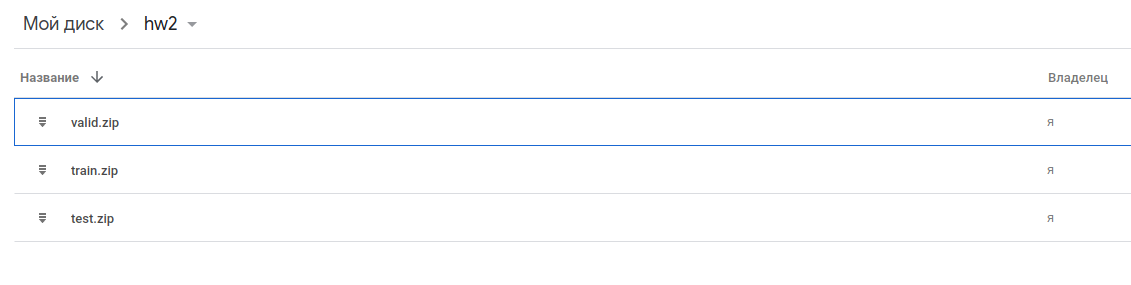

In [ ]:
# подключаем GDrive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# распакуем файлы
!cd /content/drive/MyDrive/hw2 && unzip -qq test.zip -d test && unzip -qq valid.zip -d valid && unzip -qq train.zip -d train

In [ ]:
# посмотрим на папки в train
!ls /content/drive/MyDrive/hw2/train

'ABBOTTS BABBLER'	      'GREEN MAGPIE'
'ABBOTTS BOOBY'		      'GREY PLOVER'
'ABYSSINIAN GROUND HORNBILL'  'GROVED BILLED ANI'
'AFRICAN CROWNED CRANE'        GUINEAFOWL
'AFRICAN EMERALD CUCKOO'      'GUINEA TURACO'
'AFRICAN FIREFINCH'	      'GURNEYS PITTA'
'AFRICAN OYSTER CATCHER'       GYRFALCON
 ALBATROSS		       HAMMERKOP
'ALBERTS TOWHEE'	      'HARLEQUIN DUCK'
'ALEXANDRINE PARAKEET'	      'HARLEQUIN QUAIL'
'ALPINE CHOUGH'		      'HARPY EAGLE'
'ALTAMIRA YELLOWTHROAT'       'HAWAIIAN GOOSE'
'AMERICAN AVOCET'	       HAWFINCH
'AMERICAN BITTERN'	      'HELMET VANGA'
'AMERICAN COOT'		      'HEPATIC TANAGER'
'AMERICAN GOLDFINCH'	      'HIMALAYAN BLUETAIL'
'AMERICAN KESTREL'	      'HIMALAYAN MONAL'
'AMERICAN PIPIT'	       HOATZIN
'AMERICAN REDSTART'	      'HOODED MERGANSER'
'AMETHYST WOODSTAR'	       HOOPOES
'ANDEAN GOOSE'		       HORNBILL
'ANDEAN LAPWING'	      'HORNED GUAN'
'ANDEAN SISKIN'		      'HORNED LARK'
 ANHINGA		      'HORNED SUNGEM'
 ANIANIAU		      'HOUSE FINCH'
'ANNAS HUMMINGBI

In [ ]:
# заведем путь до папки с данными
data_path = Path("/content/drive/MyDrive/hw2")

In [ ]:
# пути до отдельных датасетов
train_data_path = data_path / "train"
valid_data_path = data_path / "valid"
test_data_path = data_path / "test"

In [ ]:
# поскольку мы предсказываем индекс класса а не его имя, необходимо завести mapping имя - индекс
# mapping строится на данных трейна, все остальные классы которые не присутствуют в нем будут трактоваться как -1
class_to_idx = {}
for i, directory in enumerate(os.listdir(train_data_path)):
    # YOUR CODE

In [ ]:
class ImageDataset(Dataset):

    # определим наш ImageDataset для итерации по данным
    
    def __init__(self, file_path, transform, class_to_idx):
        self.files = list(file_path.rglob("")) # подставьте маску для файлов
        self.transform = transform
        self.class_to_idx = class_to_idx
        
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, i):
        file = self.files[i]
        img = Image.open(file)
        tensor = self.transform(img)
        label = # берем имя родительской директории file https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent
        label_id = # если label в self.class_to_idx то возращаем его id если нет то -1
        return tensor, label_id

In [ ]:
# используйте разные трансформации train чтобы для того чтобы данные были более различны можно почитать про AutoAgument https://pytorch.org/vision/stable/transforms.html#automatic-augmentation-transforms
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # Используем нормализацию изображений для ImageNet моделей
        std=[0.229, 0.224, 0.225]
    ),
    transforms.ToTensor()
])

# трансформация на валидации и тесте остается неизменной

valid_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
    transforms.ToTensor()
])

In [ ]:
train_dataset = ImageDataset(train_data_path, train_transform, class_to_idx)
valid_dataset = ImageDataset(valid_data_path, valid_transform, class_to_idx)
test_dataset = ImageDataset(test_data_path, valid_transform, class_to_idx)

In [ ]:
# Определим параметры обучения

BATCH_SIZE =
EPOCH = 
LEARNING_RATE = 
WEIGHT_DECAY = 

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

In [ ]:
net = models.alexnet(pretrained=True) # пробуйте разные модели, с предобучением на ImageNet и без
net = net.to("cuda") 

In [ ]:
optimizer = # Ваш любимый оптимизатор с параметрами LEARNING RATE и WEIGHT DECAY

In [ ]:
criteria = # используем функцию потерь для многоклассовой классификации

In [ ]:
for epoch in range(EPOCH):
    
    net. # перевести сеть в режим тренировки
    for i, (x, y) in enumerate(train_loader):
        
        optimizer. # обнулить градиент оптимизатора
        x = 
        y = # перевести x, y на cuda
        output = # получить выход сети
        loss = # посчитать лосс
        loss. # сделать backward propagation от лосса
        optimizer. # шаг оптимизатора
        
        if (i + 1) % 100 == 0:
            print(f"Epoch {epoch + 1} / 10, iteration {i + 1} / {len(train_loader)}, loss: {loss.item():.3f}")
        
    y_true = []
    y_pred = []
    
    net. # перевести сеть в режим предсказаний
    for i, (x, y) in enumerate(valid_loader):
        # выключить градиент
            x = # переводим x на cuda
            y = # переводим y в numpy массив
            
            output = # считаем выход сети
            output = # берем самый вероятный класс и переводим output на cpu и в numpy массив
            y_true.extend(y)
            y_pred.extend(output)
            
    score = accuracy_score(y_true, y_pred)
    print(f"Epoch {epoch + 1} / 10, accuracy: {score:.3f}")

In [ ]:
# считаем итоговое качество

for i, (x, y) in enumerate(test_loader):
    # выключить градиент
        x = # переводим x на cuda
        y = # переводим y в numpy массив
        
        output = # считаем выход сети
        output = # берем самый вероятный класс и переводим output на cpu и в numpy массив
        y_true.extend(y)
        y_pred.extend(output)
        
score = accuracy_score(y_true, y_pred)
print(f"Test accuracy: {score:.3f}")